In [6]:
# Import libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [7]:
# Download stock data
ticker = 'SPY'
start_date = '2015-01-01'
end_date = '2023-01-01'
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Explore the data
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,173.173767,121465900
2015-01-05,204.169998,204.369995,201.350006,201.720001,170.046371,169632600
2015-01-06,202.089996,202.720001,198.860001,199.820007,168.444641,209151400
2015-01-07,201.419998,202.720001,200.880005,202.309998,170.543671,125346700
2015-01-08,204.009995,206.160004,203.990005,205.899994,173.569962,147217800


In [8]:

stock_data.index = pd.to_datetime(stock_data.index)


# Ensure proper frequency and fill missing dates
all_dates = pd.date_range(start=stock_data.index.min(), end=stock_data.index.max(), freq='B')
stock_data = stock_data.reindex(all_dates).ffill()  # Reindex and forward fill


# Explicitly set frequency
stock_data.index.freq = pd.tseries.frequencies.to_offset('B')  # Set frequency to business day

stock_data.index.names=['Date']

# Explore the data
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,173.173767,121465900.0
2015-01-05,204.169998,204.369995,201.350006,201.720001,170.046371,169632600.0
2015-01-06,202.089996,202.720001,198.860001,199.820007,168.444641,209151400.0
2015-01-07,201.419998,202.720001,200.880005,202.309998,170.543671,125346700.0
2015-01-08,204.009995,206.160004,203.990005,205.899994,173.569962,147217800.0


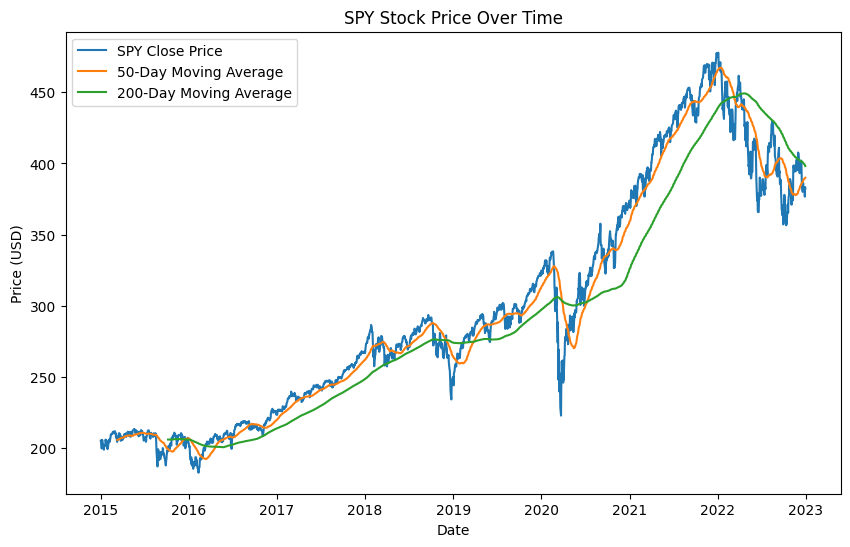

In [9]:
# Add moving averages (short = 50 days, long = 200 days)
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA_200'] = stock_data['Close'].rolling(window=200).mean()

# Visualize stock price trends
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label=f'{ticker} Close Price')
plt.plot(stock_data['MA_50'], label='50-Day Moving Average')
plt.plot(stock_data['MA_200'], label='200-Day Moving Average')
plt.title(f'{ticker} Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()



# Save preprocessed data
stock_data.to_csv('../data/preprocessed_stock_data.csv')

In [10]:
print(stock_data['Close'])

Date
2015-01-02    205.429993
2015-01-05    201.720001
2015-01-06    199.820007
2015-01-07    202.309998
2015-01-08    205.899994
                 ...    
2022-12-26    382.910004
2022-12-27    381.399994
2022-12-28    376.660004
2022-12-29    383.440002
2022-12-30    382.429993
Freq: B, Name: Close, Length: 2086, dtype: float64
